In [3]:
import numpy as np
from random import choice

def scatter_clusters(
    centers: list,
    spread: list,
    n_points: int) -> list:
    scattering = []
    for point in range(n_points):
        point_center = choice(centers)
        point_dist_x = choice(spread)
        point_dist_y = choice(spread)
        x = point_center[0]+point_dist_x
        y = point_center[1]+point_dist_y
        point_coordinate = (x,y)
        scattering.append(point_coordinate)
    return scattering

In [4]:
points = scatter_clusters(centers=[(1,2),(8,24),(40,50)],spread=list(range(12)),n_points=10)
points

[(45, 57),
 (4, 4),
 (46, 54),
 (45, 54),
 (9, 8),
 (51, 54),
 (6, 9),
 (13, 33),
 (9, 29),
 (10, 26)]

In [5]:
def center(centers, new_locations, tolerance):
    for i, coordinate in enumerate(new_locations):
        x = coordinate[0]
        y = coordinate[1]
        if centers[i][0]-x  < tolerance and centers[i][1]-y < tolerance:
            centers == new_locations
    return centers

In [41]:
from statistics import mean 
import random
def k_means(k, D, iterations, tolerance):
    centers = []
    new_locations = []
    centers_and_points = {}
    
    difference = 1
    
    xx = []
    yy = []
    for pair in D:
        xx.append(pair[0])
        yy.append(pair[1])
    lowx = min(xx)
    lowy = min(yy)
    highx = max(xx)
    highy = max(yy)
    for center in range(k):
        x = random.uniform(lowx,highx)
        y = random.uniform(lowy,highy)
        random_location = (x,y)
        centers.append(random_location)
        
    for i in range(iterations):
        
        
        if difference < tolerance:
            return centers_and_points
            
        for center in centers:
            centers_and_points[center] = []
        for point_coordinate in D:
            distances_to_centers = {}
            for center_location in centers:
                distance = np.linalg.norm([point_coordinate, center_location])
                distances_to_centers[center_location] = distance
            min_distance = min(distances_to_centers.values())
            for key, item in distances_to_centers.items():
                if item == min_distance:
                    nearest_center = key
            centers_and_points[nearest_center].append(point_coordinate)
        for center, points in centers_and_points.items():
            if len(points) > 0:
                x = []
                y = []
                for i in points:
                    x.append(i[0])
                    y.append(i[1])
                mx = mean(x)
                my = mean(y)
                new_center_location = (mx,my)
                if new_center_location not in new_locations:
                    new_locations.append(new_center_location)
        difference = np.linalg.norm(np.asarray(centers) - np.asarray(new_locations))
        centers = new_locations
    return  
    #return centers
    

In [42]:
k = 3
iterations = 100
tolerance =  0.01
d = k_means(k, points, iterations, tolerance)
d

{(34.790297105690556, 27.107587948522042): [(45, 57),
  (4, 4),
  (46, 54),
  (45, 54),
  (9, 8),
  (51, 54),
  (6, 9),
  (13, 33),
  (9, 29),
  (10, 26)],
 (20.592164372678905, 39.482023466308824): [],
 (37.87753591097333, 35.90005529653055): [],
 (23.8, 32.8): [(45, 57),
  (4, 4),
  (46, 54),
  (45, 54),
  (9, 8),
  (51, 54),
  (6, 9),
  (13, 33),
  (9, 29),
  (10, 26)]}

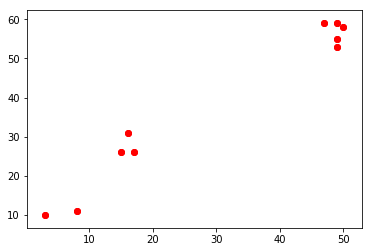

In [49]:
import matplotlib.pyplot as plt

for key, point in d.items():
    if point:
        for pair in point:
            # print(pair)
            plt.scatter(pair[0], pair[1],color='red')
plt.show()